# Identify key users
Identifying key users on social media is important to mitigate the effect of misinformation.
* Malicious users
* Bots
* Persuaders
* Trolls
* Spammers: https://arxiv.org/pdf/1406.1335.pdf

Spammers, viralizers, propagandists, disseminators?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from utils import preprocess
import time
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Load data

In [2]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# sorting by time
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
df.sort_values(by='timestamp',inplace=True)
df['viral'] = [1 if (mis!=-1 or sh > 1) else 0 for mis, sh in zip(df['misinformation'], df['shares'])]

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# # get user data from message data
# start = time.time()
# df_users = utils.get_top_users(df,None)
# df_users.to_csv('data/2018/users.csv',index=False)
# end = time.time()
# print((end-start)/60)

In [4]:
# users
df_users = pd.read_csv('data/2018/users.csv')

# credibility score with laplace smoothing
df_users['credibility'] = 1-df_users['misinformation']/(df_users['virals']+1)
df_users.head(5)

id  groups  number_of_messages  texts  text_ratio  midia  \
0 -3818310068976662355       1                4396   3742    0.851228    654   
1  5782050016593913959      11                2332    972    0.416810   1360   
2 -2072140886659020977       3                2064    948    0.459302   1116   
3  2839535797075678550       5                2020   1587    0.785644    433   
4   170916900626840870       1                1810    828    0.457459    982   

   midia_ratio  virals  viral_ratio  repeated_messages  ...  \
0     0.148772      24     0.005460                609  ...   
1     0.583190     227     0.097341                363  ...   
2     0.540698     243     0.117733                 94  ...   
3     0.214356     116     0.057426                258  ...   
4     0.542541     111     0.061326                 24  ...   

   degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
0                153    672588                      153            3672   
1               1710    498161                     1631           48057   
2                534    391490                      534           46414   
3                895    644390                      895           30154   
4                153    276930                      153           16983   

   misinformation  misinformation_degree_centrality  misinformation_strenght  \
0              10                               153                     1530   
1              58                              1506                    11907   
2              85                               534                    15800   
3              25                               866                     6179   
4              69                               153                    10557   

   misinformation_ratio  viral_misinformation_ratio  credibility  
0              0.002275                    0.416667     0.600000  
1              0.024871                    0.255507     0.745614  
2              0.041182                    0.349794     0.651639  
3              0.012376                    0.215517     0.786325  
4              0.038122                    0.621622     0.383929  

[5 rows x 27 columns]

In [5]:
print('total users: ', len(df_users))

total users:  5364


# Distributions of variables

In [6]:
def outlier_iqr(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    out = q3+1.5*(q3-q1)
    return out

def outlier(s, percentile = 0.95):
    out = s.quantile(percentile)
    return out

# Number of messages (activity)

In [7]:
print('raw number of messages')

print(df_users['number_of_messages'].describe())

msg_outlier = outlier(df_users['number_of_messages'])
print('outliers: ', msg_outlier)

raw number of messages
count    5364.000000
mean       52.684750
std       138.060355
min         1.000000
25%         3.000000
50%        13.000000
75%        45.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers:  232.84999999999945


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


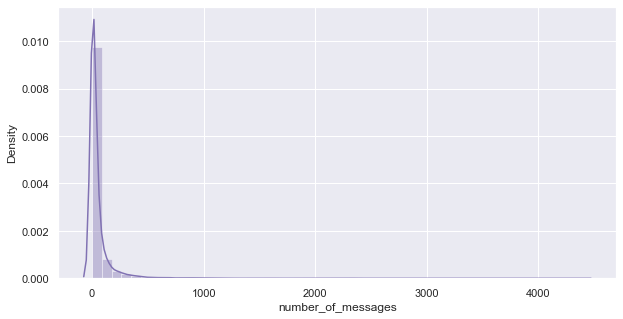

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(df_users['number_of_messages'], kde = True, color = 'C4')
plt.show()

In [9]:
print('users with low activity')
df_users[df_users['number_of_messages'] < df_users['number_of_messages'].quantile(0.25)]

users with low activity


id  groups  number_of_messages  texts  text_ratio  \
4286  8336488125908935379       1                   2      2         1.0   
4287  6875491021077833123       1                   2      0         0.0   
4288 -3336310125646763359       1                   2      0         0.0   
4289 -2527878442120488955       1                   2      2         1.0   
4290 -7122587308028551890       1                   2      0         0.0   
...                   ...     ...                 ...    ...         ...   
5359 -3685511676029813622       1                   1      0         0.0   
5360 -3687281691650946329       1                   1      0         0.0   
5361  4870300454101875011       1                   1      1         1.0   
5362  7020988212245908273       1                   1      1         1.0   
5363  2088156797951194006       1                   1      0         0.0   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
4286      0          0.0       0          0.0                  0  ...   
4287      2          1.0       0          0.0                  0  ...   
4288      2          1.0       0          0.0                  0  ...   
4289      0          0.0       0          0.0                  0  ...   
4290      2          1.0       0          0.0                  0  ...   
...     ...          ...     ...          ...                ...  ...   
5359      1          1.0       0          0.0                  0  ...   
5360      1          1.0       0          0.0                  0  ...   
5361      0          0.0       0          0.0                  0  ...   
5362      0          0.0       0          0.0                  0  ...   
5363      1          1.0       0          0.0                  0  ...   

      degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
4286                 89       178                        0               0   
4287                 92       184                        0               0   
4288                 75       150                        0               0   
4289                140       280                        0               0   
4290                166       332                        0               0   
...                 ...       ...                      ...             ...   
5359                166       166                        0               0   
5360                188       188                        0               0   
5361                 57        57                        0               0   
5362                 91        91                        0               0   
5363                188       188                        0               0   

      misinformation  misinformation_degree_centrality  \
4286               0                                 0   
4287               0                                 0   
4288               0                                 0   
4289               0                                 0   
4290               0                                 0   
...              ...                               ...   
5359               0                                 0   
5360               0                                 0   
5361               0                                 0   
5362               0                                 0   
5363               0                                 0   

      misinformation_strenght  misinformation_ratio  \
4286                        0                   0.0   
4287                        0                   0.0   
4288                        0                   0.0   
4289                        0                   0.0   
4290                        0                   0.0   
...                       ...                   ...   
5359                        0                   0.0   
5360                        0                   0.0   
5361                        0                   0.0   
5362                        0                   0

In [10]:
print('users with high activity (95 percentile)')
df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.95)]

users with high activity (95 percentile)


id  groups  number_of_messages  texts  text_ratio  \
0   -3818310068976662355       1                4396   3742    0.851228   
1    5782050016593913959      11                2332    972    0.416810   
2   -2072140886659020977       3                2064    948    0.459302   
3    2839535797075678550       5                2020   1587    0.785644   
4     170916900626840870       1                1810    828    0.457459   
..                   ...     ...                 ...    ...         ...   
264  5045562863966605913       1                 235    155    0.659574   
265  -612810256248025955       1                 234     68    0.290598   
266  7376637358209551663       1                 233     71    0.304721   
267  4305486479648129759       5                 233    171    0.733906   
268  6925899183126115693       1                 233     68    0.291845   

     midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
0      654     0.148772      24     0.005460                609  ...   
1     1360     0.583190     227     0.097341                363  ...   
2     1116     0.540698     243     0.117733                 94  ...   
3      433     0.214356     116     0.057426                258  ...   
4      982     0.542541     111     0.061326                 24  ...   
..     ...          ...     ...          ...                ...  ...   
264     80     0.340426      25     0.106383                  1  ...   
265    166     0.709402      11     0.047009                  0  ...   
266    162     0.695279      35     0.150215                  0  ...   
267     62     0.266094      97     0.416309                 79  ...   
268    165     0.708155      24     0.103004                  0  ...   

     degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
0                  153    672588                      153            3672   
1                 1710    498161                     1631           48057   
2                  534    391490                      534           46414   
3                  895    644390                      895           30154   
4                  153    276930                      153           16983   
..                 ...       ...                      ...             ...   
264                270     63450                      270            6750   
265                273     63882                      273            3003   
266                 97     22601                       97            3395   
267               1116     62170                     1116           23660   
268                302     70366                      302            7248   

     misinformation  misinformation_degree_centrality  \
0                10                               153   
1                58                              1506   
2                85                               534   
3                25                               866   
4                69                               153   
..              ...                               ...   
264              17                               270   
265               6                               273   
266              22                                97   
267              13                              1116   
268              13                               302   

     misinformation_strenght  misinformation_ratio  \
0                       1530              0.002275   
1                      11907              0.024871   
2                      15800              0.041182   
3                       6179              0.012376   
4                      10557              0.038122   
..                       ...                   ...   
264                     4590              0.072340   
265                     1638              0.025641   
266                     2134              0.094421   
267                     3016              0.055794   
268                     3926              0.055794  

In [11]:
print('analyse only active users')
df_active_users = df_users[df_users['number_of_messages'] > df_users['number_of_messages'].quantile(0.50)] 

analyse only active users


## Analysis functions

In [12]:
def messages_by_key_users(user, key_users):
    if user in key_users:
        return True
    else:
        return False
    
def group_misinformation(variable, outlier_th, group_name):
    df_group = df_users[df_users[variable] >= outlier_th]
    users_in_group = set(df_group['id'])

    # misinformation
    total_mis = len(df[df['misinformation']==1])
    print('total misinformation: ', total_mis)

    mask = []
    for u in df['id']:
        mask.append(u in users_in_group)  

    df_messages_from_group = df[mask]
    df_misinformation_from_group = df_messages_from_group[df_messages_from_group['misinformation']==1]

    print('total users:',len(df_users))
    print('total {c}: {a:1d} ({b:.1f}%)'.format(a = len(users_in_group), 
                                                b = len(users_in_group)*100/len(df_users), 
                                                c = group_name))
    
    print('total misinformation sent by {b} users: {c:} ({a:.1f}%)'.format(a = len(df_misinformation_from_group)*100/total_mis, 
                                                                            b = group_name, 
                                                                            c = len(df_misinformation_from_group)))
    
def describe_group(variable, group_name, c = 'C0'):
    print(df_active_users[variable].describe())
    outliers = outlier(df_active_users[variable])
    print('outliers threshold: ', outliers)    
    plt.figure(figsize=(10,5))
    sns.distplot(df_active_users[variable], kde = True, color = c)
    plt.show()
    group = df_active_users[df_active_users[variable] > outliers]
    users_in_group = set(group['id'])
    
    group_misinformation(variable, outliers, group_name)
    
    
    return group, users_in_group, outliers

def print_sample_messages(df_group, sorting = 'number_of_messages', user=0, n_sample = 10):
    print()
    df_group.sort_values(by=sorting, ascending=False, inplace = True)
    
    for l in list(df[(df['id']==df_group['id'].iloc[user]) & (df['midia']==0)]['text'].sample(n_sample)):
        print(l)

# Highly active

count    2633.000000
mean      102.587923
std       184.206831
min        14.000000
25%        24.000000
50%        46.000000
75%       103.000000
max      4396.000000
Name: number_of_messages, dtype: float64
outliers threshold:  361.8000000000002


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


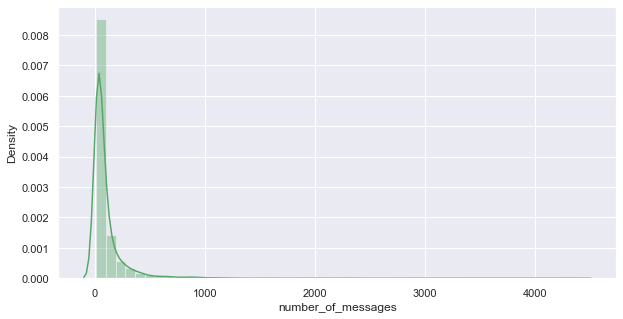

total misinformation:  11412
total users: 5364
total high activity: 132 (2.5%)
total misinformation sent by high activity users: 3750 (32.9%)

Jean Willis TB, Maria do Rosário, Tiririca.
Pessoas que eu nem imaginava estão fazendo campanha agora
Kk
Esse é o pensamento da paz dos esquerdotarios
Bolsonaro é assunto até no almoço de domingo. Na roda de amigos. QQ lugar que eu vou alguém fala dele


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


id  groups  number_of_messages  texts  text_ratio  \
0   -3818310068976662355       1                4396   3742    0.851228   
1    5782050016593913959      11                2332    972    0.416810   
2   -2072140886659020977       3                2064    948    0.459302   
3    2839535797075678550       5                2020   1587    0.785644   
4     170916900626840870       1                1810    828    0.457459   
..                   ...     ...                 ...    ...         ...   
127  3989577167192515002       2                 373    311    0.833780   
128  5887088540656239548       2                 369    276    0.747967   
129   155157134672886947       1                 368    241    0.654891   
130  3920618611127873918       1                 366    189    0.516393   
131  2508417909613649448       1                 363    239    0.658402   

     midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
0      654     0.148772      24     0.005460                609  ...   
1     1360     0.583190     227     0.097341                363  ...   
2     1116     0.540698     243     0.117733                 94  ...   
3      433     0.214356     116     0.057426                258  ...   
4      982     0.542541     111     0.061326                 24  ...   
..     ...          ...     ...          ...                ...  ...   
127     62     0.166220      51     0.136729                 56  ...   
128     93     0.252033       5     0.013550                 28  ...   
129    127     0.345109      15     0.040761                 43  ...   
130    177     0.483607       9     0.024590                 34  ...   
131    124     0.341598      26     0.071625                 41  ...   

     degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
0                  153    672588                      153            3672   
1                 1710    498161                     1631           48057   
2                  534    391490                      534           46414   
3                  895    644390                      895           30154   
4                  153    276930                      153           16983   
..                 ...       ...                      ...             ...   
127                148     20192                      148            3804   
128                346     20622                       44             220   
129                188     69184                      188            2820   
130                153     55998                      153            1377   
131                188     68244                      188            4888   

     misinformation  misinformation_degree_centrality  \
0                10                               153   
1                58                              1506   
2                85                               534   
3                25                               866   
4                69                               153   
..              ...                               ...   
127              26                               148   
128               1                                44   
129               6                               188   
130               3                               153   
131              21                               188   

     misinformation_strenght  misinformation_ratio  \
0                       1530              0.002275   
1                      11907              0.024871   
2                      15800              0.041182   
3                       6179              0.012376   
4                      10557              0.038122   
..                       ...                   ...   
127                     1924              0.069705   
128                       44              0.002710   
129                     1128              0.016304   
130                      459              0.008197   
131                     3948              0.057851  

In [13]:
df_high_activity, high_activity, messages_outlier = describe_group('number_of_messages', 'high activity', c = 'C2')
print_sample_messages(df_high_activity, sorting = 'number_of_messages', user=0, n_sample = 5)
df_high_activity

# Influencers
Users with high degree of conectivity

count    2633.000000
mean      240.422712
std       162.763890
min         3.000000
25%       140.000000
50%       270.000000
75%       302.000000
max      1710.000000
Name: degree_centrality, dtype: float64
outliers threshold:  494.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


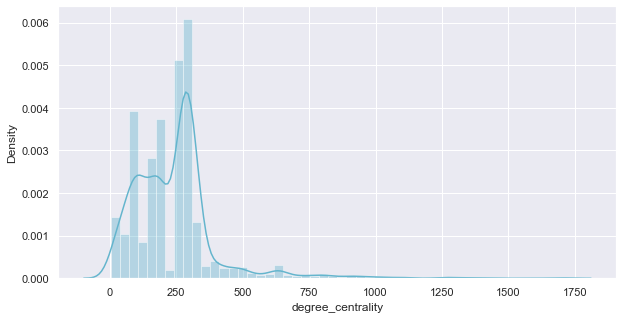

total misinformation:  11412
total users: 5364
total influencers: 170 (3.2%)
total misinformation sent by influencers users: 1702 (14.9%)

Eleito 🇧🇷🇧🇷🇧🇷
https://youtu.be/k3JeaNNISDM
Kkk ironia em
Kkkk
👏🏻👏🏻


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


id  groups  number_of_messages  texts  text_ratio  \
1     5782050016593913959      11                2332    972    0.416810   
2    -2072140886659020977       3                2064    948    0.459302   
3     2839535797075678550       5                2020   1587    0.785644   
10     620937769575483159       8                1103    872    0.790571   
13   -8623724588738162216       3                1020    279    0.273529   
...                   ...     ...                 ...    ...         ...   
2278  8290159486855748515       3                  18     16    0.888889   
2325 -8401221142032315727       2                  18      4    0.222222   
2364 -3873778220002154255       3                  17      5    0.294118   
2492  5121206937748661049       4                  15      7    0.466667   
2591  -632311808282765422       3                  14     13    0.928571   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
1      1360     0.583190     227     0.097341                363  ...   
2      1116     0.540698     243     0.117733                 94  ...   
3       433     0.214356     116     0.057426                258  ...   
10      231     0.209429      60     0.054397                177  ...   
13      741     0.726471     174     0.170588                155  ...   
...     ...          ...     ...          ...                ...  ...   
2278      2     0.111111       1     0.055556                  1  ...   
2325     14     0.777778       1     0.055556                  0  ...   
2364     12     0.705882       1     0.058824                  0  ...   
2492      8     0.533333       4     0.266667                  5  ...   
2591      1     0.071429       7     0.500000                  4  ...   

      degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
1                  1710    498161                     1631           48057   
2                   534    391490                      534           46414   
3                   895    644390                      895           30154   
10                 1418    177196                     1002            9903   
13                  782    261182                      782           44858   
...                 ...       ...                      ...             ...   
2278                800      5316                      326             326   
2325                634      5814                      326             326   
2364                639      3670                      308             308   
2492                739      2869                      739             739   
2591                617      3682                      617            1400   

      misinformation  misinformation_degree_centrality  \
1                 58                              1506   
2                 85                               534   
3                 25                               866   
10                23                              1002   
13               100                               782   
...              ...                               ...   
2278               0                                 0   
2325               0                                 0   
2364               0                                 0   
2492               0                                 0   
2591               0                                 0   

      misinformation_strenght  misinformation_ratio  \
1                       11907              0.024871   
2                       15800              0.041182   
3                        6179              0.012376   
10                       3531              0.020852   
13                      25954              0.098039   
...                       ...                   ...   
2278                        0              0.000000   
2325                        0              0.000000   
2364                        0              0.000000   
2492                        0              0.0000

In [14]:
df_influencers, influencers, degree_outlier = describe_group('degree_centrality', 'influencers', c = 'C9')
print_sample_messages(df_influencers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_influencers

# Propagandists
High viral strenght

count     2633.000000
mean      1556.834030
std       4175.779238
min          0.000000
25%         91.000000
50%        450.000000
75%       1352.000000
max      97306.000000
Name: viral_strenght, dtype: float64
outliers threshold:  6279.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



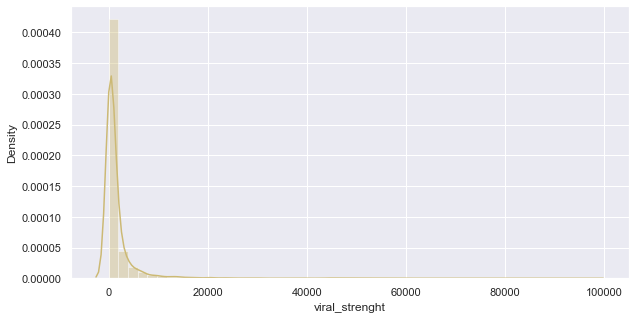

total misinformation:  11412
total users: 5364
total propagandists: 133 (2.5%)
total misinformation sent by propagandists users: 4307 (37.7%)

Kkkkk verdade
Uhum boa ne
4 CPFS cancelados em Manaus após assalto a uma casa lotérica e a população aplaudindo com gritos de Bolsonaro!!! Isso é Brasil a hora do povo de bem é agora !!!
Isso eu tinha reparado...mas não da pra apontar como um comparsa 🤷🏻♂.
Se tiver mais algum que não vi me avisem


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  groups  number_of_messages  texts  text_ratio  \
1     5782050016593913959      11                2332    972    0.416810   
2    -2072140886659020977       3                2064    948    0.459302   
3     2839535797075678550       5                2020   1587    0.785644   
4      170916900626840870       1                1810    828    0.457459   
5    -6433788305811138375       1                1584    466    0.294192   
...                   ...     ...                 ...    ...         ...   
601    799523027131826315       1                 114     63    0.552632   
607   4788373104899399217       3                 113     92    0.814159   
744   2509103027295802299       1                  91     45    0.494505   
808  -2686121708101756989       3                  84     43    0.511905   
1278 -7649344784600108030       1                  48     48    1.000000   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
1      1360     0.583190     227     0.097341                363  ...   
2      1116     0.540698     243     0.117733                 94  ...   
3       433     0.214356     116     0.057426                258  ...   
4       982     0.542541     111     0.061326                 24  ...   
5      1118     0.705808     193     0.121843                 10  ...   
...     ...          ...     ...          ...                ...  ...   
601      51     0.447368      25     0.219298                  6  ...   
607      21     0.185841      69     0.610619                 41  ...   
744      46     0.505495      23     0.252747                  0  ...   
808      41     0.488095      30     0.357143                 25  ...   
1278      0     0.000000      47     0.979167                 44  ...   

      viral_degree_centrality  viral_strenght  misinformation  \
1                        1631           48057              58   
2                         534           46414              85   
3                         895           30154              25   
4                         153           16983              69   
5                         153           29529             117   
...                       ...             ...             ...   
601                       273            6825               6   
607                       390           13476               2   
744                       326            7498              13   
808                       641            6413               3   
1278                      166            7802              47   

      misinformation_degree_centrality  misinformation_strenght  \
1                                 1506                    11907   
2                                  534                    15800   
3                                  866                     6179   
4                                  153                    10557   
5                                  153                    17901   
...                                ...                      ...   
601                                273                     1638   
607                                390                      390   
744                                326                     4238   
808                                641                      641   
1278                               166                     7802   

      misinformation_ratio  viral_misinformation_ratio  credibility  \
1                 0.024871                    0.255507     0.745614   
2                 0.041182                    0.349794     0.651639   
3                 0.012376                    0.215517     0.786325   
4                 0.038122                    0.621622     0.383929   
5                 0.073864                    0.606218     0.396907   
...                    ...                         ...          ...   
601               0.052632                    0.240000     0.769231   
607               0.017699                    0.028986     0.971429   
744     

In [64]:
df_propagandists, propagandists, viral_strenght_outlier = describe_group('viral_strenght', 'propagandists', c = 'C8')
print_sample_messages(df_propagandists, sorting = 'number_of_messages', user=0, n_sample = 5)
df_propagandists

# Possible Bots
Users with suspicious patterns of activity

### Viral ratio

count    2633.000000
mean        0.080015
std         0.093791
min         0.000000
25%         0.012048
50%         0.057143
75%         0.117647
max         1.000000
Name: viral_ratio, dtype: float64
outliers threshold:  0.24487025948103802


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


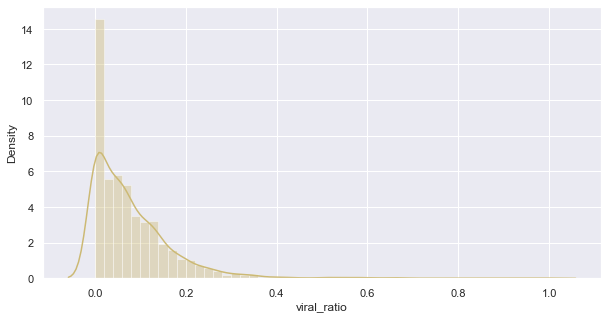

total misinformation:  11412
total users: 5364
total viralizers: 468 (8.7%)
total misinformation sent by viralizers users: 1693 (14.8%)

https://chat.whatsapp.com/DUYOwcwKgvsK6gcD9GHciM


Direita Opressora chega na UFT e no IFTO de Palmas

Reunião: 26/10/2018
Pauta: Curso de conservadorismo no curso de Economia e Pedagogia.

Envio a todos estudantes do Tocantins, investimento e oportunidade!

Confira!
https://chat.whatsapp.com/DUYOwcwKgvsK6gcD9GHciM


Direita Opressora chega na UFT e no IFTO de Palmas

Reunião: 26/10/2018
Pauta: Curso de conservadorismo no curso de Economia e Pedagogia.

Envio a todos estudantes do Tocantins, investimento e oportunidade!

Confira!
https://clebertoledo.com.br/politica/vicentinho-jr-gaguim-e-eli-borges-sao-alvo-de-protesto-de-evento-de-bolsonaristas/

Tá no Cleber Toledo:

            *Os apoiadores do presidenciável Jair Bolsonaro argumentam que os dirigentes do PSL teriam permitido a entrega da coordenação da campanha do capitão “aos dois políticos do 

<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


id  groups  number_of_messages  texts  text_ratio  \
16   -9166534760459654877       8                 964    640    0.663900   
18   -4365731339186281047       7                 951    406    0.426919   
39   -5426274422942733548       6                 712    431    0.605337   
70    5428835759879898822       7                 530    354    0.667925   
73    2660222405768274296       3                 520    193    0.371154   
...                   ...     ...                 ...    ...         ...   
2521 -3649372505195215632       3                  15     15    1.000000   
2553 -1262571921909839756       1                  14      7    0.500000   
2591  -632311808282765422       3                  14     13    0.928571   
2603  2841547953877816965       1                  14     11    0.785714   
2608 -5576498171657241479       2                  14      9    0.642857   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
16      324     0.336100     569     0.590249                497  ...   
18      545     0.573081     260     0.273396                265  ...   
39      281     0.394663     283     0.397472                178  ...   
70      176     0.332075     182     0.343396                120  ...   
73      327     0.628846     129     0.248077                 95  ...   
...     ...          ...     ...          ...                ...  ...   
2521      0     0.000000      10     0.666667                  7  ...   
2553      7     0.500000       5     0.357143                  0  ...   
2591      1     0.071429       7     0.500000                  4  ...   
2603      3     0.214286       9     0.642857                  5  ...   
2608      5     0.357143       8     0.571429                  4  ...   

      degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
16                 1260    169073                     1260           97306   
18                 1266    180079                     1266           49941   
39                 1080    150659                     1080           58364   
70                 1336    146787                     1336           44646   
73                  569     99029                      569           23686   
...                 ...       ...                      ...             ...   
2521                438      2287                      438            1462   
2553                148      2072                      148             740   
2591                617      3682                      617            1400   
2603                202      2828                      202            1818   
2608                421      2716                      421            1684   

      misinformation  misinformation_degree_centrality  \
16               111                              1260   
18               135                              1266   
39               141                              1080   
70                53                              1336   
73                21                               569   
...              ...                               ...   
2521               0                                 0   
2553               5                               148   
2591               0                                 0   
2603               1                               202   
2608               2                               421   

      misinformation_strenght  misinformation_ratio  \
16                      18523              0.115145   
18                      25971              0.141956   
39                      28601              0.198034   
70                      12711              0.100000   
73                       3841              0.040385   
...                       ...                   ...   
2521                        0              0.000000   
2553                      740              0.357143   
2591                        0              0.000000   
2603                      202              0.0714

In [16]:
df_viralizers, viralizers, viral_ratio_outlier = describe_group('viral_ratio', 'viralizers', c = 'C8')
print_sample_messages(df_viralizers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_viralizers

### Midia ratio

count    2633.000000
mean        0.451095
std         0.240415
min         0.000000
25%         0.263158
50%         0.462687
75%         0.640719
max         1.000000
Name: midia_ratio, dtype: float64
outliers threshold:  0.8278017241379311


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


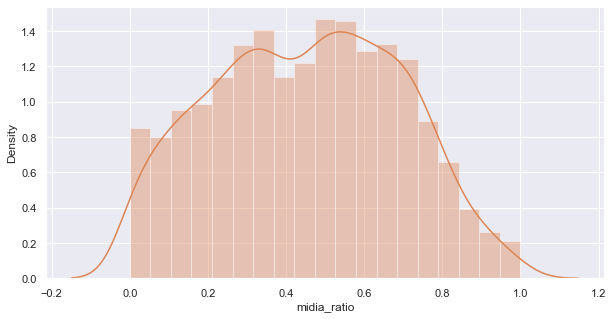

total misinformation:  11412
total users: 5364
total midia sharers: 702 (13.1%)
total misinformation sent by midia sharers users: 151 (1.3%)

*É legal a entidade que fiscaliza as eleicoes, se reunir com a chapa do PT ??*  🤔🇧🇷💩
Covardia da fachada em pai de familiar covardia
Copacabana no RJ hoje
Bravo general Mourão! ! ! Rumo a vitória. 👇🏼
Ameaça existe


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


id  groups  number_of_messages  texts  text_ratio  \
78    -219310841950453287       1                 484     74    0.152893   
156  -6751793192245753920       2                 335     46    0.137313   
262   2456757965557025813       4                 237     33    0.139241   
356  -3459365403520904542       3                 181     21    0.116022   
359      4173679385744376       1                 181     16    0.088398   
...                   ...     ...                 ...    ...         ...   
2581 -2467811906975488182       1                  14      1    0.071429   
2597  7074938153153379136       1                  14      0    0.000000   
2611  -522115093907410041       1                  14      2    0.142857   
2619 -3009142299518862577       1                  14      1    0.071429   
2630 -5062203177920930563       1                  14      2    0.142857   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
78      410     0.847107      13     0.026860                  1  ...   
156     289     0.862687       7     0.020896                  8  ...   
262     204     0.860759      17     0.071730                 11  ...   
356     160     0.883978       8     0.044199                  1  ...   
359     165     0.911602       6     0.033149                  0  ...   
...     ...          ...     ...          ...                ...  ...   
2581     13     0.928571       0     0.000000                  0  ...   
2597     14     1.000000       0     0.000000                  0  ...   
2611     12     0.857143       1     0.071429                  0  ...   
2619     13     0.928571       1     0.071429                  0  ...   
2630     12     0.857143       0     0.000000                  0  ...   

      degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
78                  202     97768                      202            2626   
156                 354     62958                      188            1316   
262                 739     47556                      739            2927   
356                 353     45308                      270            2160   
359                  25      4525                       25             150   
...                 ...       ...                      ...             ...   
2581                273      3822                        0               0   
2597                 11       154                        0               0   
2611                188      2632                      188             188   
2619                202      2828                      202             202   
2630                200      2800                        0               0   

      misinformation  misinformation_degree_centrality  \
78                 9                               202   
156                2                               188   
262               13                               739   
356                3                               270   
359                3                                25   
...              ...                               ...   
2581               0                                 0   
2597               0                                 0   
2611               1                               188   
2619               0                                 0   
2630               0                                 0   

      misinformation_strenght  misinformation_ratio  \
78                       1818              0.018595   
156                       376              0.005970   
262                      2111              0.054852   
356                       810              0.016575   
359                        75              0.016575   
...                       ...                   ...   
2581                        0              0.000000   
2597                        0              0.000000   
2611                      188              0.071429   
2619                        0              0.0000

In [17]:
df_midia_sharers, midia_sharers, midia_ratio_outlier = describe_group('midia_ratio', 'midia sharers', c = 'C1')
print_sample_messages(df_midia_sharers, sorting = 'number_of_messages', user=0, n_sample = 5)
df_midia_sharers


# Temporal pattern
Messages by day

In [18]:
df_users[['days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers']].describe()

days_active   daily_mean    daily_std  daily_median     daily_95  \
count  5364.000000  5364.000000  4217.000000   5364.000000  5364.000000   
mean     33.325130     2.108895     2.777722      1.369500     5.480397   
std      30.039501     5.031530     4.656666      4.838491     9.766039   
min       1.000000     0.027523     0.000000      0.000000     0.000000   
25%       3.000000     0.403762     0.707107      0.000000     1.000000   
50%      28.000000     1.000000     1.420627      0.000000     2.300000   
75%      59.000000     2.000000     3.181617      1.000000     5.950000   
max     120.000000   149.000000   148.492424    149.000000   243.500000   

       daily_outliers  
count     5364.000000  
mean         1.566555  
std          1.458944  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          3.000000  
max          6.000000

count    2633.000000
mean        9.248557
std        12.793024
min         0.000000
25%         3.000000
50%         5.350000
75%        10.550000
max       243.500000
Name: daily_95, dtype: float64
outliers threshold:  28.540000000000006


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


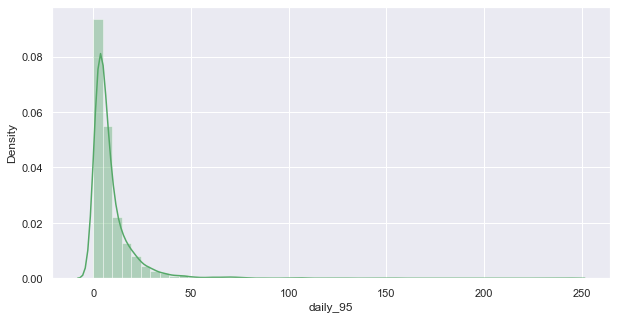

total misinformation:  11412
total users: 5364
total high frequency: 132 (2.5%)
total misinformation sent by high frequency users: 2532 (22.2%)

Desespero do Merisio ataca Cmdt Moisés e é criticado por radialista...!!!👇🏽👇🏽👇🏽😆😆😆👏🏼👏🏼👏🏼👏🏼👏🏼
Eu coloco no status faz uns 2 anos as falas do Bolsonaro kkk💪🏻💪🏻🇧🇷🇧🇷
https://youtu.be/7E3x9lt6tSU
Kkkk
Bolsonaro no SBT


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.sort_values(by=sorting, ascending=False, inplace = True)


id  groups  number_of_messages  texts  text_ratio  \
0    -3818310068976662355       1                4396   3742    0.851228   
1     5782050016593913959      11                2332    972    0.416810   
2    -2072140886659020977       3                2064    948    0.459302   
3     2839535797075678550       5                2020   1587    0.785644   
4      170916900626840870       1                1810    828    0.457459   
...                   ...     ...                 ...    ...         ...   
1626  1774461991715304158       1                  34     34    1.000000   
1714  2266474191122315389       1                  31     20    0.645161   
1732  2844188469946317284       1                  31     31    1.000000   
1771  7546988258114118532       1                  30     17    0.566667   
1800  6849206815438765557       1                  29     20    0.689655   

      midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
0       654     0.148772      24     0.005460                609  ...   
1      1360     0.583190     227     0.097341                363  ...   
2      1116     0.540698     243     0.117733                 94  ...   
3       433     0.214356     116     0.057426                258  ...   
4       982     0.542541     111     0.061326                 24  ...   
...     ...          ...     ...          ...                ...  ...   
1626      0     0.000000       0     0.000000                 30  ...   
1714     11     0.354839       0     0.000000                  9  ...   
1732      0     0.000000       0     0.000000                  1  ...   
1771     13     0.433333       1     0.033333                  0  ...   
1800      9     0.310345       1     0.034483                  0  ...   

      degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
0                   153    672588                      153            3672   
1                  1710    498161                     1631           48057   
2                   534    391490                      534           46414   
3                   895    644390                      895           30154   
4                   153    276930                      153           16983   
...                 ...       ...                      ...             ...   
1626                  3       102                        0               0   
1714                 73      2263                        0               0   
1732                140      4340                        0               0   
1771                166      4980                      166             166   
1800                 75      2175                       75              75   

      misinformation  misinformation_degree_centrality  \
0                 10                               153   
1                 58                              1506   
2                 85                               534   
3                 25                               866   
4                 69                               153   
...              ...                               ...   
1626               0                                 0   
1714               0                                 0   
1732               0                                 0   
1771               0                                 0   
1800               0                                 0   

      misinformation_strenght  misinformation_ratio  \
0                        1530              0.002275   
1                       11907              0.024871   
2                       15800              0.041182   
3                        6179              0.012376   
4                       10557              0.038122   
...                       ...                   ...   
1626                        0              0.000000   
1714                        0              0.000000   
1732                        0              0.000000   
1771                        0              0.0000

In [19]:
df_time_bots, time_bots, time_bots_outlier = describe_group('daily_95', 'high frequency', c = 'C2')
print_sample_messages(df_time_bots, sorting = 'number_of_messages', user=1, n_sample = 5)
df_time_bots

### Compare timeseries of most active users
* top high activity
* top influencer
* top propagandist
* top viralizer
* top midia sharers
* top user with no virals
* top user with no misinformation

Alta atividade
Influenciadores
Propagandistas
Divulgadores de virais
Divulgadores de mídia

In [20]:
def get_user_timeseries(user, frame = '24H'):
    df_user = df[df['id'] == user]
    messages_by_frame = df_user.groupby('timestamp').count()['id'].resample(frame).sum()
    return messages_by_frame

In [21]:
# regular users
top_no_virals = list(df_users[(df_users['virals']==0)]['id'])[0]
top_no_mis = list(df_users[(df_users['misinformation']==0)]['id'])[0]

# engaged users
top_active = list(df_active_users['id'])[0]
top_influencer = list(df_influencers['id'])[0]
top_propagandist = list(df_propagandists['id'])[0]

# possible bots
top_midia_sharer = list(df_midia_sharers['id'])[0]
top_viralizer = list(df_viralizers['id'])[0]

In [22]:

dict_timeseries = {'usuário mais ativo sem mensagens virais': top_no_virals,
                  'usuário mais ativo sem desinformação': top_no_mis,
                  #'usuário mais ativo': top_active,
                  'influenciador mais ativo': top_influencer,
                  'propagandista mais ativo':top_propagandist,
                  'divulgador de virais mais ativo': top_viralizer,
                  'divulgador de mídia mais ativo': top_midia_sharer}

# dict_timeseries = {'usuário mais ativo sem mensagens virais': top_no_virals,
#                   'usuário mais ativo sem desinformação': top_no_mis,
#                   'divulgador de virais mais ativo': top_viralizer,
#                   'divulgador de mídia mais ativo': top_midia_sharer}

timeseries_frames = []
user_group = []
for k in dict_timeseries.keys():
    timeseries = get_user_timeseries(dict_timeseries[k], frame = '1D').to_frame()    
    timeseries_frames.append(timeseries)
    user_group += [k]*len(timeseries)

df_timeseries = pd.concat(timeseries_frames).fillna(int(0))
df_timeseries['grupo'] = user_group
df_timeseries['mensagens por dia'] = df_timeseries['id']
df_timeseries.reset_index(level=0, inplace=True)

In [23]:
fig = px.area(df_timeseries, x='timestamp', y='mensagens por dia', color='grupo',
              facet_col="grupo", hover_name="grupo", facet_col_wrap=2)
fig.show()

# Sources of misinformation

# Misinformers

### Raw number of misinformation shared by active users

count    2633.000000
mean        4.136726
std        10.059828
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       147.000000
Name: misinformation, dtype: float64
outliers threshold:  17.0


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



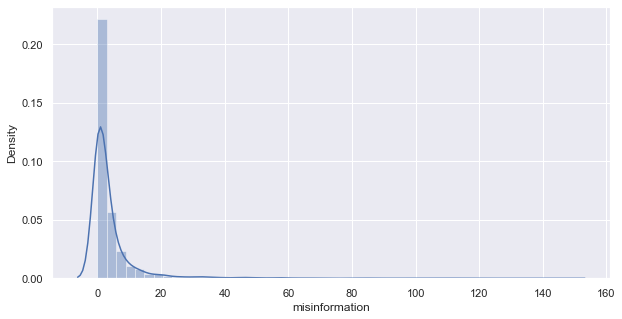

total misinformation:  11412
total users: 5364
total misinformers: 134 (2.5%)
total misinformation sent by misinformers users: 4973 (43.6%)

No Ceará, o Comando Vermelho proibiu propaganda do Bolsonaro nos territórios que "administra" 

https://www.opovo.com.br/jornal/reportagem/2018/08/a-interferencia-das-faccoes-criminosas-no-processo-eleitoral.html
https://renovamidia.com.br/folha-passa-pano-em-agressao-de-ciro-gomes-contra-jornalista/
https://youtu.be/M5kZiXRxIc4
*Ciro Gomes* volta de viagem e acaba com *Haddad* e *PT* ......    *COMPARTILHE!!!*
https://youtu.be/vvCI_F6wuP4
Reinaldo Azedo, aquele panfleteiro dos tucanos passando vergonha com sua enquete patética. Votem lá... Vamos melhorar esse placar
https://youtu.be/rmXkbe7fZnY
📢📢 *URGENTE!* 📢📢

Campanha para pressionar o Congresso a aprovar, *em regime de urgência*, uma ementa constitucional que garanta o voto impresso no segundo turno!

 *É ISSO OU É SE PREPARAR PARA O BRASIL VIRAR UMA VENEZUELA* 

https://youtu.be/4WeiU2dglcQ


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  groups  number_of_messages  texts  text_ratio  \
24   2878545449163323727       3                 883    439    0.497169   
39  -5426274422942733548       6                 712    431    0.605337   
18  -4365731339186281047       7                 951    406    0.426919   
5   -6433788305811138375       1                1584    466    0.294192   
16  -9166534760459654877       8                 964    640    0.663900   
..                   ...     ...                 ...    ...         ...   
94   8371047632500103882       1                 437    118    0.270023   
486  3076210903474883370       1                 141     62    0.439716   
625  6322190196637205632       2                 110     49    0.445455   
230  3131070151123675038       1                 261    101    0.386973   
680 -4001364801948757926       2                 100     63    0.630000   

     midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
24     444     0.502831     187     0.211778                177  ...   
39     281     0.394663     283     0.397472                178  ...   
18     545     0.573081     260     0.273396                265  ...   
5     1118     0.705808     193     0.121843                 10  ...   
16     324     0.336100     569     0.590249                497  ...   
..     ...          ...     ...          ...                ...  ...   
94     319     0.729977      38     0.086957                  4  ...   
486     79     0.560284      25     0.177305                  2  ...   
625     61     0.554545      37     0.336364                 23  ...   
230    160     0.613027      28     0.107280                  1  ...   
680     37     0.370000      32     0.320000                 18  ...   

     degree_centrality  strenght  viral_degree_centrality  viral_strenght  \
24                 603    172068                      603           34560   
39                1080    150659                     1080           58364   
18                1266    180079                     1266           49941   
5                  153    242352                      153           29529   
16                1260    169073                     1260           97306   
..                 ...       ...                      ...             ...   
94                 168     73416                      168            6384   
486                 57      8037                       57            1425   
625                331     18202                      331            6123   
230                308     80388                      308            8624   
680                122      5964                      122            1912   

     misinformation  misinformation_degree_centrality  \
24              147                               603   
39              141                              1080   
18              135                              1266   
5               117                               153   
16              111                              1260   
..              ...                               ...   
94               18                               168   
486              18                                57   
625              18                               331   
230              18                               308   
680              18                               122   

     misinformation_strenght  misinformation_ratio  \
24                     26559              0.166478   
39                     28601              0.198034   
18                     25971              0.141956   
5                      17901              0.073864   
16                     18523              0.115145   
..                       ...                   ...   
94                      3024              0.041190   
486                     1026              0.127660   
625                     2979              0.163636   
230                     5544              0.068966   
680                     1066              0.180000  

In [24]:
df_misinformers, misinformers, misinformation_outlier = describe_group('misinformation', 'misinformers', c = 'C0')
print_sample_messages(df_misinformers, sorting = 'misinformation', user=0, n_sample = 10)
df_misinformers

### Correlations

In [25]:
df_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_users['id']]
df_active_users['misinformer'] = ['misinformer' if m in misinformers else 'non_misinformer' for m in df_active_users['id']]

<ipython-input-25-2ca3941697fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df_misinformers.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
       'strenght', 'viral_degree_centrality', 'viral_strenght',
       'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility'],
      dtype='object')

raw


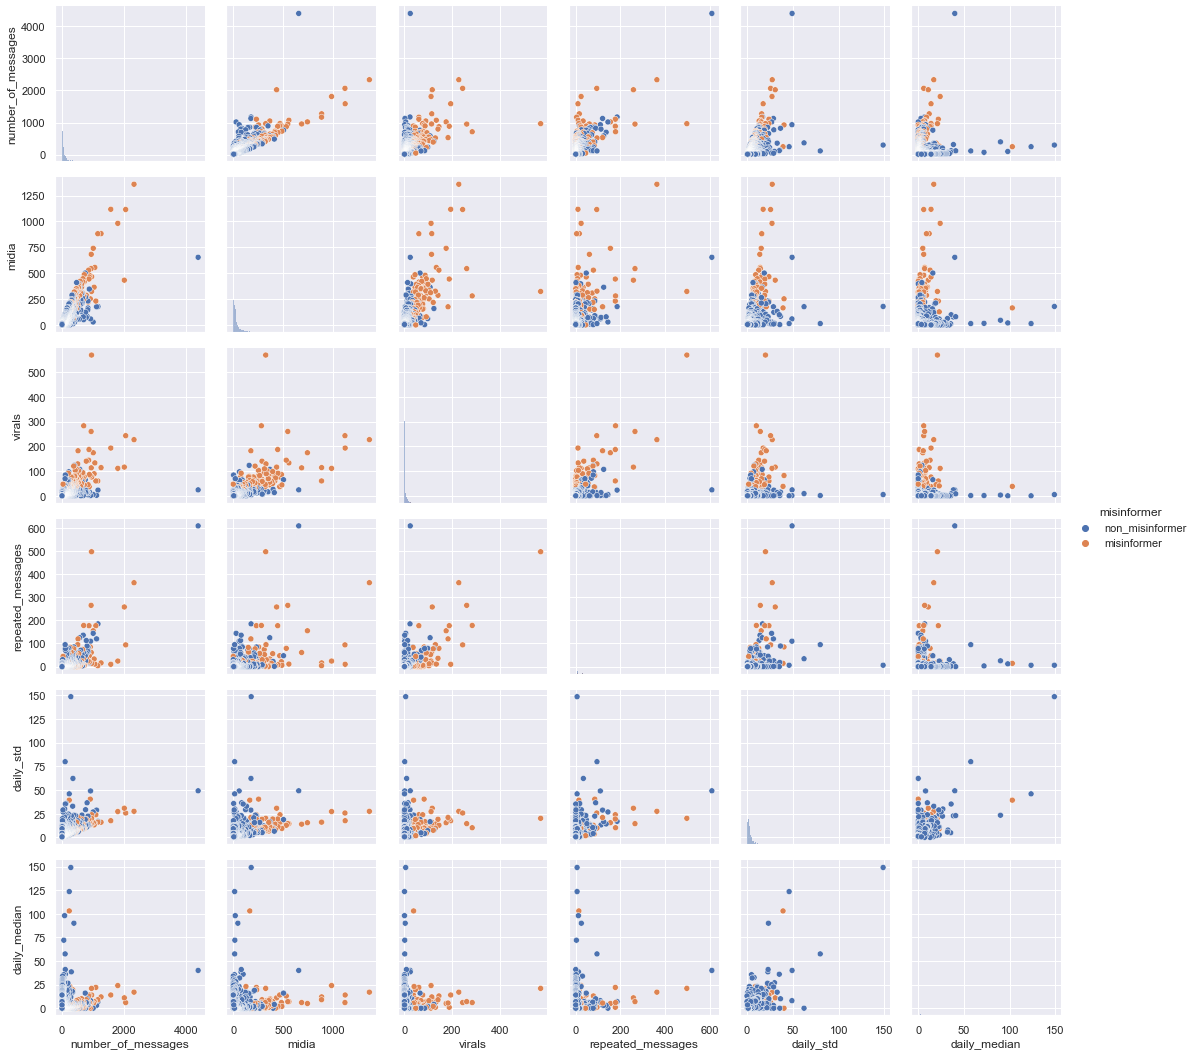

In [27]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_median','misinformer']], 
                 hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

graph


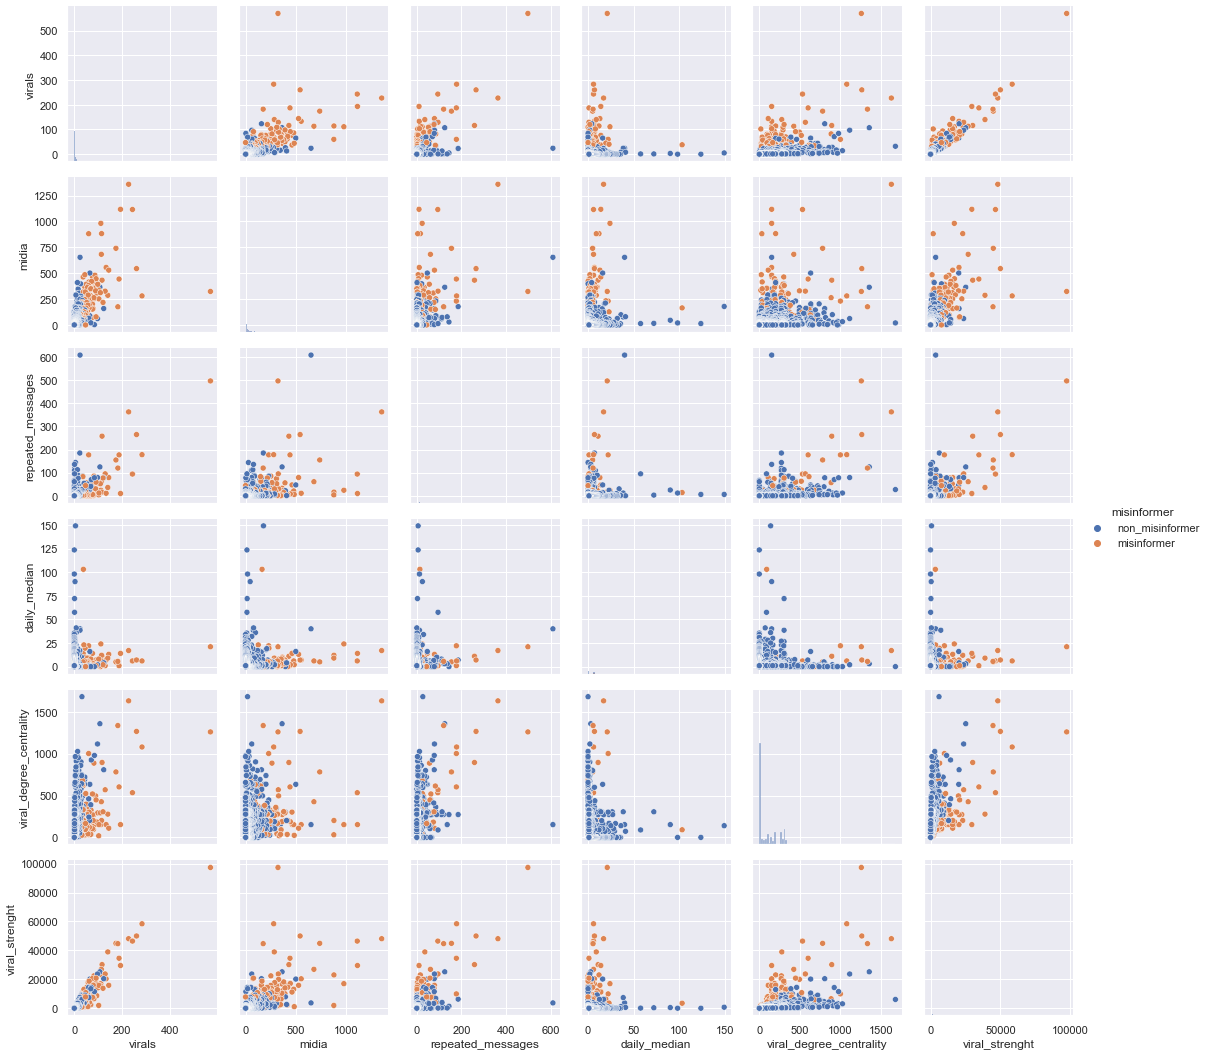

In [94]:
print('graph')
g = sns.PairGrid(df_users[['virals', 'midia','repeated_messages','daily_median','viral_degree_centrality', 'viral_strenght',                            
                           'misinformer']], hue = 'misinformer')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Anoter definition of misinformers based on graph features (strenght of connections): superspreaders

count     2633.000000
mean       756.490315
std       1915.113345
min          0.000000
25%          0.000000
50%        210.000000
75%        652.000000
max      28601.000000
Name: misinformation_strenght, dtype: float64
outliers threshold:  3333.6000000000004


C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



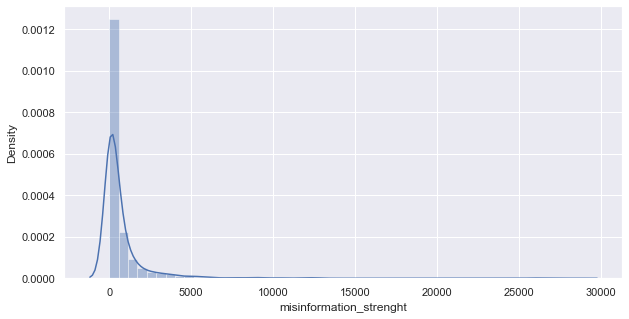

total misinformation:  11412
total users: 5364
total superspreaders: 132 (2.5%)
total misinformation sent by superspreaders users: 4533 (39.7%)

https://youtu.be/zQuOt2NoU_A
https://youtu.be/BLhZlkpAsM8
https://youtu.be/d-mHCX8CR-A..................... *⭕Hacker que fraudou as eleições está pronto para atacar* - 06/10/2018 - Joice hasselmann - *compartilhem!!!!*
https://youtu.be/d-qZpq_l_QU
https://youtu.be/homD6iTnq_Q


<ipython-input-12-d699642f54f8>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  groups  number_of_messages  texts  text_ratio  \
24   2878545449163323727       3                 883    439    0.497169   
39  -5426274422942733548       6                 712    431    0.605337   
18  -4365731339186281047       7                 951    406    0.426919   
5   -6433788305811138375       1                1584    466    0.294192   
16  -9166534760459654877       8                 964    640    0.663900   
..                   ...     ...                 ...    ...         ...   
139  4663145275462981855       1                 356    229    0.643258   
429  8038726262758897273       1                 155     47    0.303226   
413 -6449133970849284306       1                 160     41    0.256250   
234 -8683522735082230313       1                 253    169    0.667984   
885  8750816619327250849       1                  77     22    0.285714   

     midia  midia_ratio  virals  viral_ratio  repeated_messages  ...  \
24     444     0.502831     187     0.211778                177  ...   
39     281     0.394663     283     0.397472                178  ...   
18     545     0.573081     260     0.273396                265  ...   
5     1118     0.705808     193     0.121843                 10  ...   
16     324     0.336100     569     0.590249                497  ...   
..     ...          ...     ...          ...                ...  ...   
139    127     0.356742      31     0.087079                  4  ...   
429    108     0.696774      18     0.116129                  0  ...   
413    119     0.743750      14     0.087500                  0  ...   
234     84     0.332016      17     0.067194                  1  ...   
885     55     0.714286      14     0.181818                  2  ...   

     strenght  viral_degree_centrality  viral_strenght  misinformation  \
24     172068                      603           34560             147   
39     150659                     1080           58364             141   
18     180079                     1266           49941             135   
5      242352                      153           29529             117   
16     169073                     1260           97306             111   
..        ...                      ...             ...             ...   
139    108936                      306            9486              12   
429     47430                      306            5508              11   
413     52160                      326            4564              11   
234     77924                      308            5236              11   
885     23716                      308            4312              11   

     misinformation_degree_centrality  misinformation_strenght  \
24                                603                    26559   
39                               1080                    28601   
18                               1266                    25971   
5                                 153                    17901   
16                               1260                    18523   
..                                ...                      ...   
139                               306                     3672   
429                               306                     3366   
413                               326                     3586   
234                               308                     3388   
885                               308                     3388   

     misinformation_ratio  viral_misinformation_ratio  credibility  \
24               0.166478                    0.786096     0.218085   
39               0.198034                    0.498233     0.503521   
18               0.141956                    0.519231     0.482759   
5                0.073864                    0.606218     0.396907   
16               0.115145                    0.195079     0.805263   
..                    ...                         ...          ...   
139              0.033708                    0.387097     0.625000   
429           

In [29]:
df_superspreaders, superspreaders, misinformation_strenght_outlier = describe_group('misinformation_strenght', 'superspreaders', c = 'C0')
print_sample_messages(df_superspreaders, sorting = 'misinformation', user=0, n_sample = 5)
df_superspreaders

In [30]:
df_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_users['id']]
df_active_users['superspreader'] = ['superspreader' if m in superspreaders else 'non_superspreader' for m in df_active_users['id']]

<ipython-input-30-d9fa728e7ebb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Correlations

raw


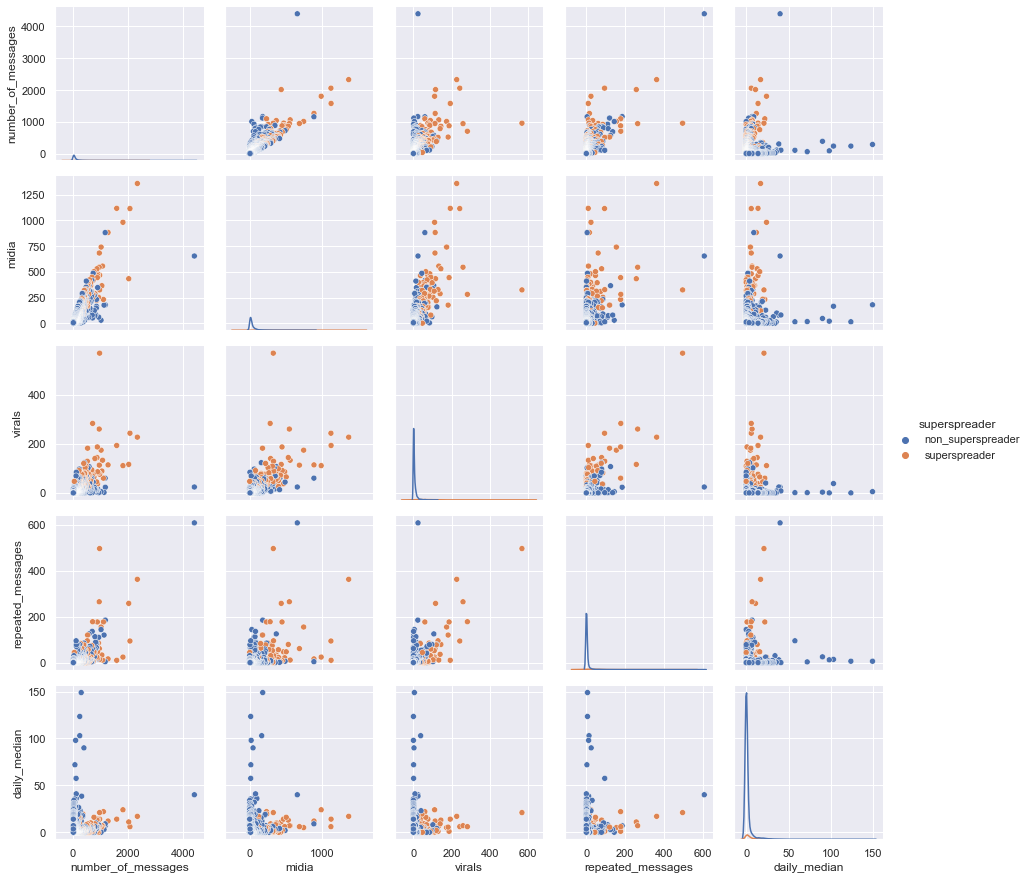

In [71]:
print('raw')
g = sns.PairGrid(df_active_users[['number_of_messages', 'midia', 'virals', 'repeated_messages',
                                  'daily_median','superspreader']], 
                 hue = 'superspreader')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

graph


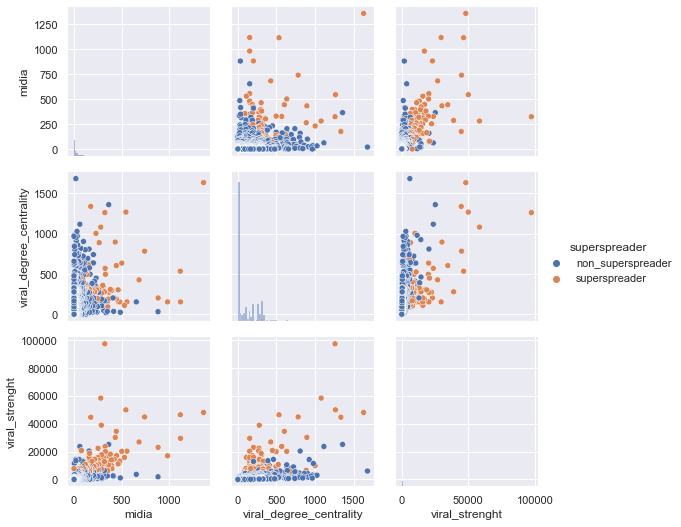

In [110]:
print('graph')
g = sns.PairGrid(df_users[['midia','viral_degree_centrality', 'viral_strenght', 
                           'superspreader']], hue = 'superspreader')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Intersection between groups
* most_active (post a lot of messages) **maybe change names?**
* influencers (highly connected - )
* propagandists (post abnormal quantity of viral messages - viral ratio or **virals**?)
* midia_sharers (post abnormal quantity of midia - midia ratio)
* misinformers (post abnormal quantity of misinformation)
* superspreaders (abnormal quantity of reach of misinformation)

In [44]:
user_groups = {'high_activity':high_activity,
                    'influencers':influencers,
                    'propagandists':propagandists,
                    'viralizers':viralizers,
                    'midia_sharers':midia_sharers,
                    'misinformers':misinformers,
                    'superspreaders':superspreaders}

In [46]:
intersections[]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [59]:
intersections = np.zeros((len(user_groups), len(user_groups)))
for i, k in enumerate(user_groups):
    for j, p in enumerate(user_groups):
        intersec = user_groups[k].intersection(user_groups[p])
        len_intersec = len(intersec)
        total_len = len(user_groups[k])
        percentage = len_intersec/total_len
        intersections[i][j] = percentage
        
df_intersections = pd.DataFrame(intersections, columns = user_groups, index = user_groups).round(2)
df_intersections.style.background_gradient(cmap ='Blues')

# Detection of misinformers

In [84]:
def print_class_balance(y, keys = ['positive', 'negative']):
    pos_mask = y == 1 
    pos = y[pos_mask]
    neg_mask = y == 0 
    neg = y[neg_mask]
    values = [pos.shape[0],neg.shape[0]]
    g = sns.barplot(x = keys, y = values)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 5), textcoords = 'offset points')

superspreaders


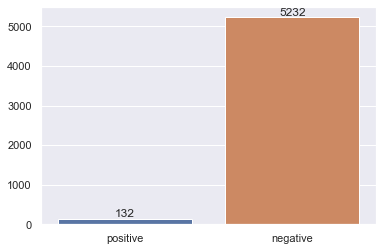

In [85]:
print('superspreaders')
y_s = np.array([1 if m == 'superspreader' else 0 for m in df_users['superspreader']])
print_class_balance(y_s)

misinformers


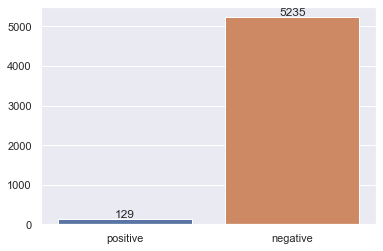

In [86]:
print('misinformers')
y_m = np.array([1 if m == 'misinformer' else 0 for m in df_users['misinformer']])        
print_class_balance(y_m)

## Rules
* viral strenght equal or higher than outlier

In [74]:
def rules_classification(df_users, metrics):
    predictions = []
    for i in range(len(df_users)):
        pred = 0
        u = df_users.iloc[0]['id']
        
        for metric in metrics:
            u_metric = df_users.iloc[i][metric]
            metric_outlier = outlier(df_active_users[metric])
            if u_metric >= metric_outlier:
                pred = 1
                break
                
        predictions.append(pred)
        
    return predictions


In [65]:
df_users.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
       'strenght', 'viral_degree_centrality', 'viral_strenght',
       'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility', 'misinformer',
       'superspreader'],
      dtype='object')

## Superspreaders

### Rule set \#1

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5232
           1       0.78      0.79      0.78       132

    accuracy                           0.99      5364
   macro avg       0.89      0.89      0.89      5364
weighted avg       0.99      0.99      0.99      5364

0,989
0,005
0,781
0,787
0,784
0


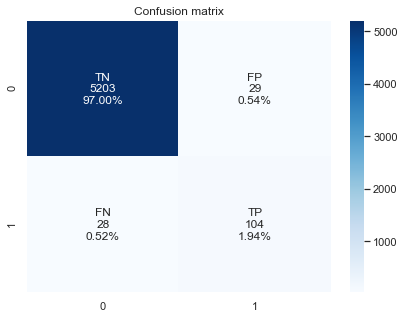

In [91]:
metrics = ['viral_strenght']
y_pred = rules_classification(df_users, metrics)
m1 = utils.get_test_metrics(y_s, y_pred,full_metrics=True)

## Misinformers

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5235
           1       0.78      0.81      0.79       129

    accuracy                           0.99      5364
   macro avg       0.89      0.90      0.89      5364
weighted avg       0.99      0.99      0.99      5364

0,989
0,005
0,781
0,806
0,793
0


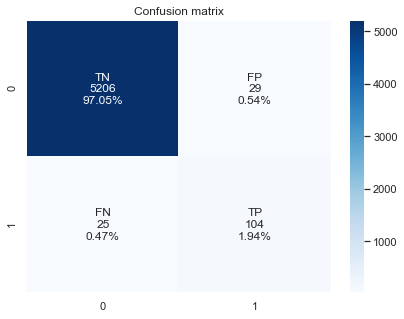

In [89]:
metrics = ['virals']
y_pred = rules_classification(df_users, metrics)
m1 = utils.get_test_metrics(y_m, y_pred,full_metrics=True)

# Machine learning model

In [96]:
df_users.columns

Index(['id', 'groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
       'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
       'repeated_messages_ratio', 'days_active', 'daily_mean', 'daily_std',
       'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
       'strenght', 'viral_degree_centrality', 'viral_strenght',
       'misinformation', 'misinformation_degree_centrality',
       'misinformation_strenght', 'misinformation_ratio',
       'viral_misinformation_ratio', 'credibility', 'misinformer',
       'superspreader'],
      dtype='object')

In [105]:
all_features = ['groups', 'number_of_messages', 'texts', 'text_ratio', 'midia',
               'midia_ratio', 'virals', 'viral_ratio', 'repeated_messages',
               'repeated_messages_ratio', 'days_active', 'daily_mean',
               'daily_median', 'daily_95', 'daily_outliers', 'degree_centrality',
               'strenght', 'viral_degree_centrality', 'viral_strenght']

X = df_users[all_features] #.to_numpy()
y = y_s

# normalization
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X_z = (X - mu ) / sigma

In [100]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[0.         0.01111865 0.0063559  0.01844636 0.07307964 0.01978347
 0.         0.02949341 0.0126945  0.02500199 0.         0.02071641
 0.         0.02955133 0.0082703  0.00517793 0.00517793 0.02957238
 0.70555981]


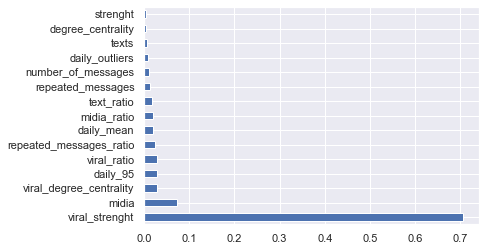

In [109]:
# feature importance
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_z, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [111]:
features = list(feat_importances.nlargest(3).index)
features

['viral_strenght', 'midia', 'viral_degree_centrality']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train, X_test = utils.z_score(X_train,X_test)

logistic regression
0.24
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       0.92      0.92      0.92        26

    accuracy                           1.00      1073
   macro avg       0.96      0.96      0.96      1073
weighted avg       1.00      1.00      1.00      1073

AUC:  0.9987877452060833


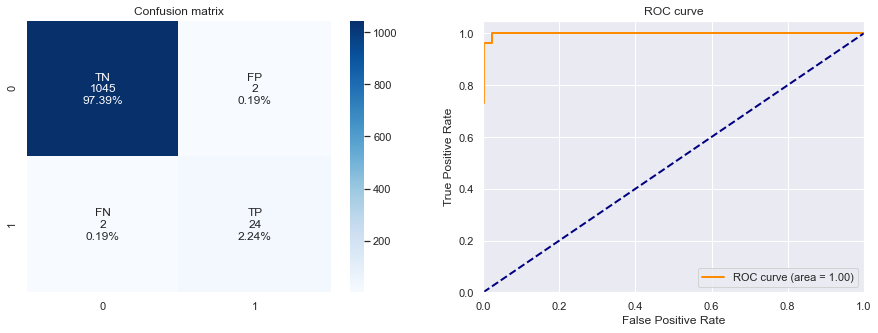

0,996
0,001
0,923
0,923
0,923
0,998


(0.9962721342031687,
 0.0019102196752626144,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9987877452060833)

In [117]:
print('logistic regression')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)